In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
1) Warm up question

n=10000;
B=sc.parallelize(range(n))

#find the number of elements in the RDD B


# get the first few elements of an RDD
print 'first element=',
print 'first 5 elements = ',

In [ ]:
2) Given an RDD of words, find and output one of the longest words

words=['this','is','the','best','mac','ever','jupyter']
wordRDD=sc.parallelize(words)

In [ ]:
#answer
wordRDD.reduce(lambda w,v: w if len(w)>len(v) else v)

In [ ]:
# Remove duplicate element in DuplicateRDD, we get distinct RDD
DuplicateRDD = sc.parallelize([1,1,2,2,3,3])

In [ ]:
# answer
DistinctRDD = DuplicateRDD.distinct()

In [17]:
# Given an RDD, create a new RDD where each element appears twice
A=sc.parallelize(range(5))
print 'A=',A.collect()
#A= [0, 1, 2, 3, 4]
print 'duplicating each element=', A.flatMap(lambda a: [a,a]).collect()
# duplicating each element= [0, 0, 1, 1, 2, 2, 3, 3, 4, 4]

 A= [0, 1, 2, 3, 4]
duplicating each element= [0, 0, 1, 1, 2, 2, 3, 3, 4, 4]


In [ ]:
# answer 
print 'duplicating each element=', A.flatMap(lambda a: [a,a]).collect()

In [ ]:
B=sc.parallelize(range(-10,20))
# 3) How many positive numbers?

In [ ]:
#answer
B.filter(lambda n: n > 0).count()

## Working with Key/value pairs
Spark provides specific functions to deal with RDDs in which each element is a key/value pair. Key/value RDDs expose new operations (e.g. aggregating and grouping together data with the same key and grouping together two different RDDs.) Such RDDs are also called pair RDDs. **In python, each element of a pair RDD is a pair tuple.**

In [5]:
# Compute and print the largest value for each key.
rdd = sc.parallelize([(1,2), (2,4), (2,6)])
print "Original RDD :", rdd.collect()

Original RDD : [(1, 2), (2, 4), (2, 6)]


In [6]:
# answer
print rdd.reduceByKey(lambda a,b: max(a,b)).collect()

[(2, 6), (1, 2)]


In [9]:
# Sort an pair RDD by value and print the result
rdd = sc.parallelize([(2,2), (1,4), (3,6),(2,1)])
print "Original RDD :", rdd.collect()
print "After transformation : ",

Original RDD : [(2, 2), (1, 4), (3, 6), (2, 1)]
After transformation :  [(1, 4), (2, 2), (2, 1), (3, 6)]


In [ ]:
print "After transformation : ", rdd.sortByKey().collect()

In [18]:
rdd = sc.parallelize([(1,2), (2,4), (2,6)])
print "Original RDD :", rdd.collect()
print "After transformation : ", rdd.groupByKey().mapValues(lambda x:[a for a in x]).collect()

Original RDD : [(1, 2), (2, 4), (2, 6)]
After transformation :  [(2, [4, 6]), (1, [2])]


In [24]:
#Perform an outer join of the two (key,value) RDDs:
A=sc.parallelize([('john','dow'),('adam','kalai'),('beth','simon')])
B=sc.parallelize([('beth','F'),('john','M'),('vaclav','M')])

[('adam', ('kalai', None)),
 ('vaclav', (None, 'M')),
 ('john', ('dow', 'M')),
 ('beth', ('simon', 'F'))]

In [ ]:
#answer
A.fullOuterJoin(B).collect()

## Computing Statistics

In [51]:
4) Suppose X is an RDD where each element is a floating point value. write code to 
**efficiently** compute a good **approximation** of the median value?
from numpy.random import rand
X=sc.parallelize(rand(10000000)/2)

In [48]:
#answer
L=X.sample(False,0.001).collect()
L=sorted(L)
L[len(L)/2]

0.25058720389041689

In [ ]:
5) For The same RDD, compute the mean and the standard deviation

In [49]:
#answer
from numpy import sqrt
(N,S,S2)=X.map(lambda x: (1,x,x*x)).reduce(lambda a,b:(a[0]+b[0],a[1]+b[1],a[2]+b[2]))
E=S/N
Var=S2/N-E**2
print 'mean=%f, std=%f'%(E,sqrt(Var))

In [67]:
#6) Suppose R is an RDD of tuples, each tuple containing two floating point numbers 
#$(x,y)$. Compute the covariance of $x$ and $y$ using a single pass over the RDD.

import numpy as np
n=10000
a=rand(n); b=rand(n)
R=sc.parallelize(zip(5*a+b,5*a-b))

In [68]:
#answer
(N,X,Y,XY)=R.map(lambda x:np.array([1,x[0],x[1],x[0]*x[1]])).reduce(lambda a,b:a+b)
print 'cov(x,y)=',XY/N-(X/N)*(Y/N)

(10000.0, 29788.509672070322, 19764.978532869351, 78995.237297205415)

7) Suppose R is an RDD that contains integer numbers in the range 0 to 3. Write an RDD the efficiently computes an approximate histogram.

In [3]:
X=([0]*10000+[1]*23000+[2]*15532+[3]*10000)
keys=rand(len(X))
R=sc.parallelize(zip(keys,X)).cache()
print R.getNumPartitions()
R=R.repartitionAndSortWithinPartitions(2).map(lambda x:x[1])
R.take(20)

2


[1, 2, 0, 2, 2, 2, 1, 0, 2, 3, 2, 1, 1, 0, 1, 2, 0, 1, 0, 1]

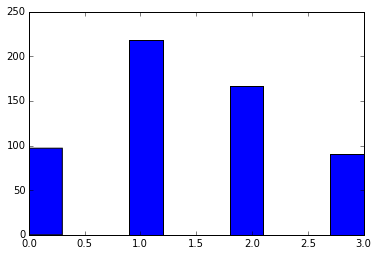

In [111]:
H=R.sample(False,0.01).collect()
hist(H);

In [ ]:
#excercise lazy evaluation and the use of cache()

from math import cos
def taketime(i): ## An operation that takes 
    [cos(j) for j in range(10)]
    return cos(i)

Interm=RDD.map(lambda x: taketime(x))